<a href="https://colab.research.google.com/github/sujith-645/devtern/blob/main/Fake_News_Detection_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, GRU
from sklearn.metrics import confusion_matrix,classification_report

stopword = set(STOPWORDS)

from tensorflow.keras.layers import BatchNormalization
from keras import regularizers

In [ ]:
fake_data=pd.read_csv("../input/fake-news-detection-dataset-english/Fake.csv/Fake.csv")

In [ ]:
fake_data.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
real_data=pd.read_csv("../input/fake-news-detection-dataset-english/True.csv/True.csv")

In [ ]:
real_data.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_data["subject"].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
real_data["subject"].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

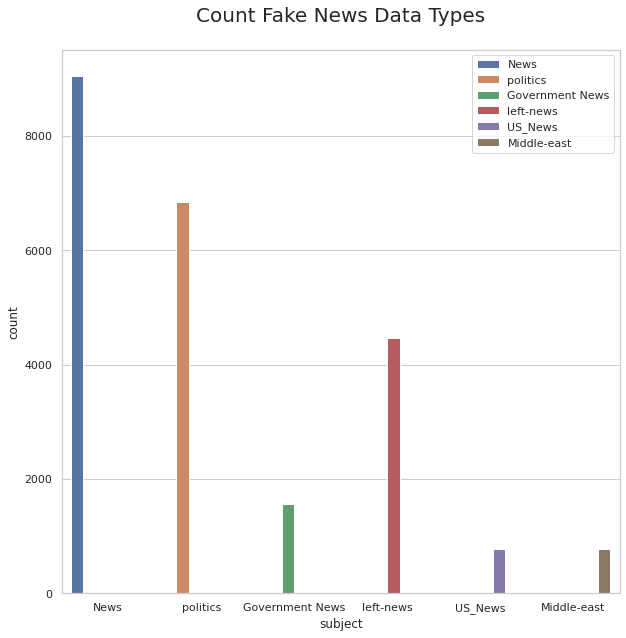

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.countplot(x="subject",data=fake_data,hue="subject")
plt.title("Count Fake News Data Types\n",fontsize=20)
plt.legend(loc="best")
plt.show()

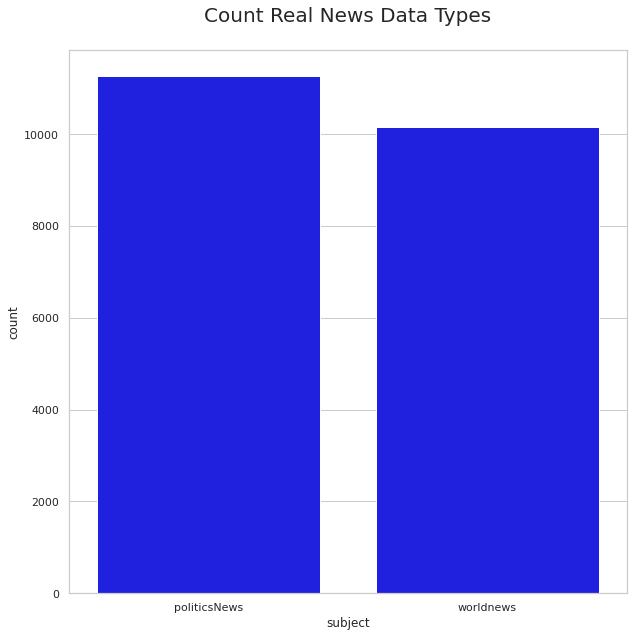

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=real_data["subject"],color='blue')
plt.title("Count Real News Data Types\n",fontsize=20)
plt.show()

In [ ]:
fake_text=" ".join(fake_data["text"].tolist())

Fake Text Wordcloud

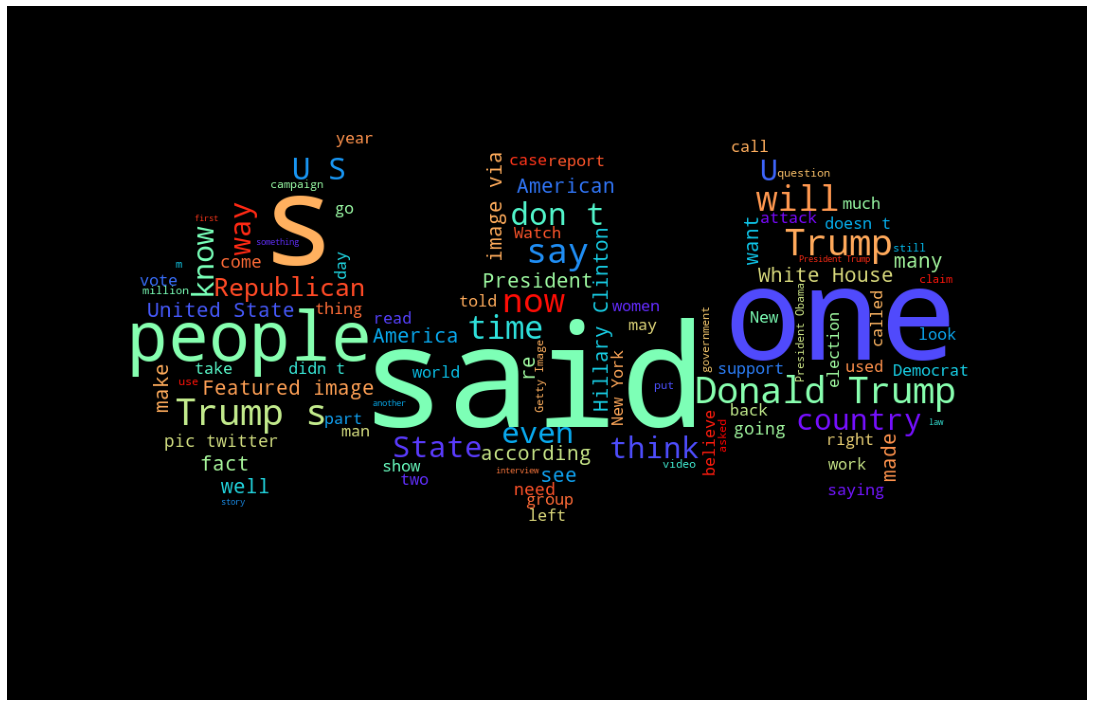

In [ ]:
plt.figure(figsize=(15,15))
wordcloud=WordCloud(stopwords=stopword,width=1600,height=800,max_words=100,mask=wordcloud_mask,colormap='rainbow').generate(fake_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

Real Text Wordcloud

In [ ]:
real_text=" ".join(real_data["text"].tolist())

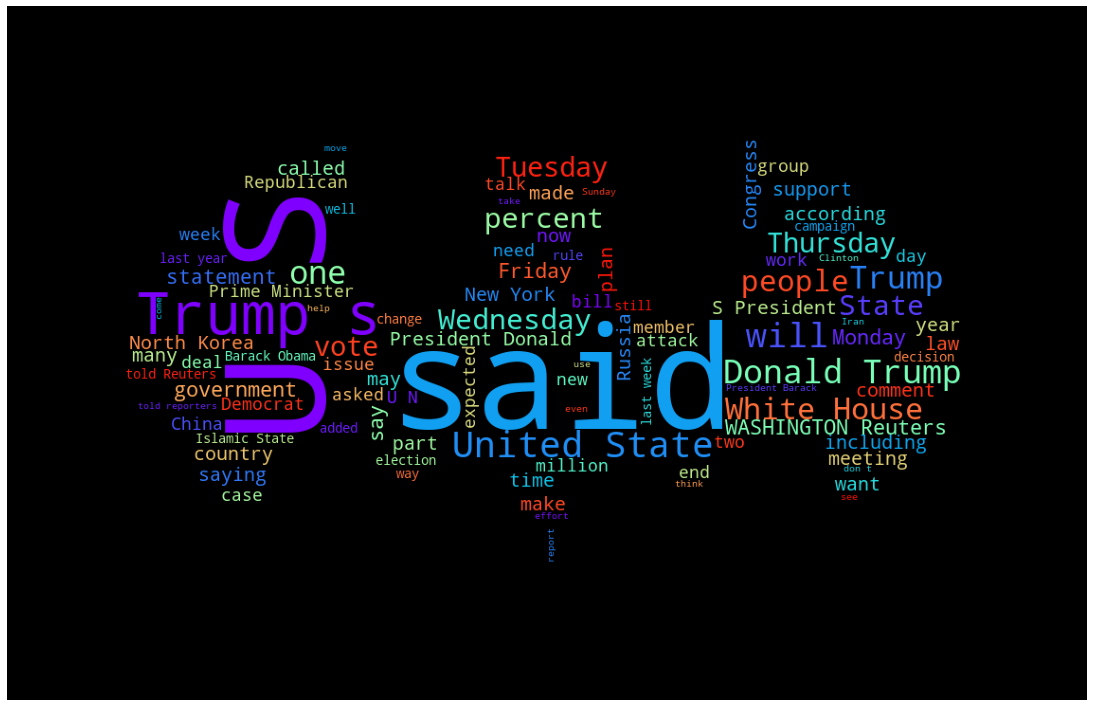

In [ ]:
plt.figure(figsize=(15,15))
wordcloud=WordCloud(stopwords=stopword,width=1600,height=800,max_words=100,mask=wordcloud_mask,colormap='rainbow').generate(real_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

In [ ]:
unknown_publishers=[]
for index,row in enumerate(real_data.text.values):
   try:
     record=row.split("-",  maxsplit=1)
     record[1]

     assert(len(record[0])<120)
   except:
    unknown_publishers.append(index)

In [ ]:
real_data.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
real_data=real_data.drop(8970,axis=0)

In [ ]:
publisher=[]
temp_text=[]
for index,row in enumerate(real_data.text.values):
  if index in unknown_publishers:
    temp_text.append(row)
    publisher.append("unknow")
  else:
    record=row.split("-",maxsplit=1)
    publisher.append(record[0].strip())
    temp_text.append(record[1].strip())

In [ ]:
real_data["publisher"]=publisher
real_data["text"]=temp_text

In [ ]:
real_data.sample(5)

,title,text,subject,date,publisher
2544,Trump says Yellen and Cohn possible Fed chair ...,U.S. President Donald Trump named on Tuesday t...,politicsNews,"July 25, 2017",(Reuters)
15358,Russian spy agency building catches fire in Mo...,A building used by Russia s foreign spy servic...,worldnews,"November 8, 2017",MOSCOW (Reuters)
13403,Exclusive: Yemen rebel missiles fired at Saudi...,Remnants of four ballistic missiles fired into...,worldnews,"November 30, 2017",UNITED NATIONS (Reuters)
17195,Xi says China has prevented Taiwan independenc...,Chinese President Xi Jinping said on Wednesday...,worldnews,"October 18, 2017",BEIJING (Reuters)
3283,Trump says Comey testimony showed 'no obstruct...,U.S. President Donald Trump on Friday said tes...,politicsNews,"June 9, 2017",WASHINGTON (Reuters)


In [ ]:
empty_fake_index=[index for index,text in enumerate(fake_data.text.tolist()) if str(text).strip()==""]

In [ ]:
fake_data.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real_data["text"] =real_data["title"]+""+ real_data["text"]
fake_data["text"] =fake_data["title"]+""+ fake_data["text"]

In [ ]:
real_data["text"]=real_data["text"].apply(lambda x:str(x).lower())
fake_data["text"]=fake_data["text"].apply(lambda x:str(x).lower())

In [ ]:
real_data["label"]=1
fake_data["label"]=0

In [ ]:
real_data=real_data[["text","label"]]

In [ ]:
fake_data=fake_data[["text","label"]]

In [ ]:
final_data=real_data.append(fake_data,ignore_index=True)

In [ ]:
final_data.sample(5)

,text,label
28701,everyone is freaking out over this ‘visitor’ ...,0
22138,the gop senate just set a huge trap for trump...,0
13554,egypt's sisi calls on military chief to secure...,1
2149,pence says nafta renegotiation will be a 'win ...,1
28371,this moving message to trump supporters might...,0


In [ ]:
final_data.shape

(44897, 2)

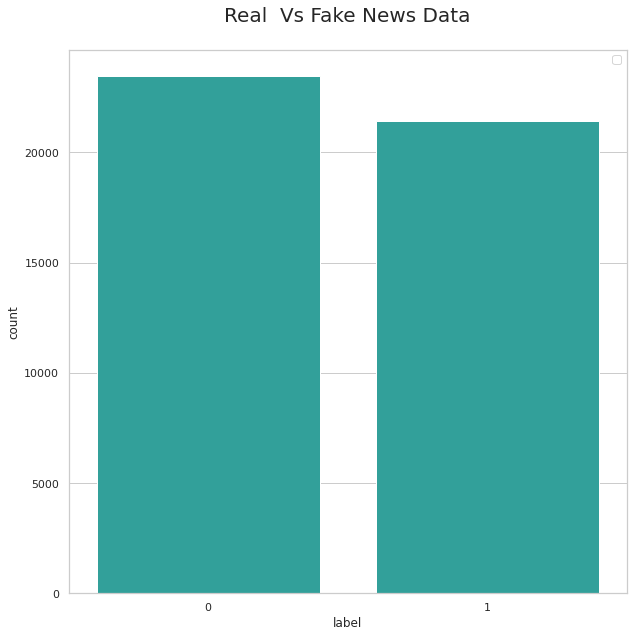

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x="label",data=final_data,color="lightseagreen")
plt.title("Real  Vs Fake News Data\n",fontsize=20)
plt.legend(loc="best")
plt.show()

In [ ]:
from nltk.corpus import stopwords
import preprocess_kgptalkie as ps
stopwords=stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Cleaning

In [ ]:
def get_clean(x):
#     x = str(x).lower().replace('\\', '').replace('_', ' ')
#     x = ps.cont_exp(x)
#     x = ps.remove_emails(x)
#     x = ps.remove_urls(x)
#     x = ps.remove_html_tags(x)
#     x = ps.remove_rt(x)
#     x = ps.remove_accented_chars(x)
#     x = ps.remove_special_chars(x)
#     x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
final_data["text"]=final_data["text"].apply(get_clean)

In [ ]:
text_data=final_data["text"].copy()

In [ ]:
label_data=final_data["label"].values


In [ ]:
corpus = []
for i in range(0, len(text_data)):
    review = text_data[i]
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

In [ ]:

embedding_dim=100

In [ ]:
vocab_size = 20000
onehot_encoding=[one_hot(words,vocab_size)for words in corpus]

In [ ]:
max_len=1000
embedded_docs=pad_sequences(onehot_encoding,maxlen=max_len,padding='pre')

In [ ]:
X_data=np.array(embedded_docs)
Y_label=np.array(label_data)

In [ ]:
X_train,X_test, Y_train,Y_test = train_test_split(X_data,Y_label, test_size=0.3, random_state=42,shuffle=True)

Create GRU Model

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_length=max_len,trainable=False))
model.add(BatchNormalization())
model.add(GRU(units=128,activation="tanh",kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

2022-11-15 14:51:22.695934: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 14:51:22.696897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 14:51:22.698218: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 14:51:22.699020: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 14:51:22.699779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         2000000   
_________________________________________________________________
batch_normalization (BatchNo (None, 1000, 100)         400       
_________________________________________________________________
gru (GRU)                    (None, 128)               88320     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1,patience=50)

In [ ]:
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=42,callbacks=[callback])

Epoch 1/10


2022-11-15 14:51:25.476272: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-15 14:51:27.867844: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


749/749 [==============================] - 39s 47ms/step - loss: 0.1936 - accuracy: 0.9255 - val_loss: 0.1679 - val_accuracy: 0.9370
Epoch 2/10
749/749 [==============================] - 35s 47ms/step - loss: 0.0550 - accuracy: 0.9870 - val_loss: 0.0364 - val_accuracy: 0.9927
Epoch 3/10
749/749 [==============================] - 35s 47ms/step - loss: 0.0392 - accuracy: 0.9916 - val_loss: 0.0663 - val_accuracy: 0.9823
Epoch 4/10
749/749 [==============================] - 35s 47ms/step - loss: 0.0305 - accuracy: 0.9941 - val_loss: 0.0545 - val_accuracy: 0.9855
Epoch 5/10
749/749 [==============================] - 35s 47ms/step - loss: 0.0292 - accuracy: 0.9950 - val_loss: 0.0300 - val_accuracy: 0.9948
Epoch 6/10
749/749 [==============================] - 35s 47ms/step - loss: 0.0289 - accuracy: 0.9947 - val_loss: 0.1018 - val_accuracy: 0.9716
Epoch 7/10
749/749 [==============================] - 35s 47ms/step - loss: 0.0256 - accuracy: 0.9954 - val_loss: 0.1115 - val_accuracy: 0.9713
Epo

In [ ]:
def model_loss_and_accuracy(history):

    fig=plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],"b*--",label="accuracy")
    plt.plot(history.history["val_accuracy"],"r*--",label="val_accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy")
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()


    plt.subplot(222)
    plt.plot(history.history["loss"],"b*--",label="loss")
    plt.plot(history.history["val_loss"],"r*--",label="val_loss")
    plt.title("Model Loss")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

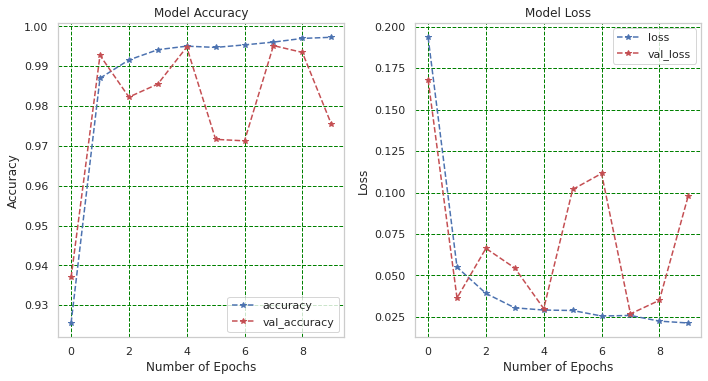

In [ ]:
 model_loss_and_accuracy(history)

In [ ]:
class_name=["Fake","Real"]

In [ ]:
predict_label=(model.predict(X_test) > 0.5).astype("int32")
confusion_matrix = confusion_matrix(Y_test,predict_label)

In [ ]:
confusion_matrix_label = ["True Negative","False Negative","False Positive","True Positive"]
confusion_matrix_value_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
confusion_matrix_value_percentage= ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
confusion_matrix_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(confusion_matrix_label,confusion_matrix_value_counts ,confusion_matrix_value_percentage)]
confusion_matrix_labels = np.asarray(confusion_matrix_labels).reshape(2,2)

Confusion Matrix

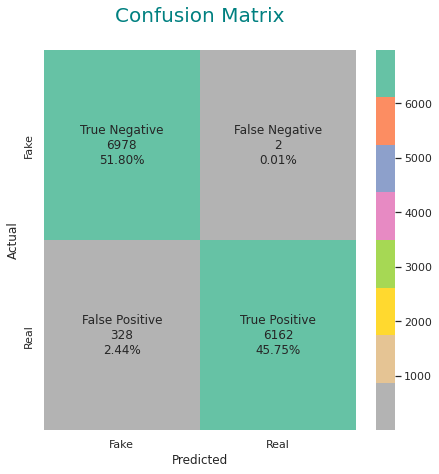

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=confusion_matrix_labels, fmt="", cmap='Set2_r',xticklabels=class_name,yticklabels=class_name)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix\n",fontsize=20,color="teal")
plt.show()

Classification Report

In [ ]:
print(classification_report(Y_test,predict_label,target_names=["Fake","Real"]))

              precision    recall  f1-score   support

        Fake       0.96      1.00      0.98      6980
        Real       1.00      0.95      0.97      6490

    accuracy                           0.98     13470
   macro avg       0.98      0.97      0.98     13470
weighted avg       0.98      0.98      0.98     13470



Custom Data Prediction

In [ ]:
custom_data="Iran's leaders have portrayed the anti-government protests as  instigated by foreign enemies"

In [ ]:
test_data= []
for i in range(0, len(custom_data)):
    review =custom_data[i]
    review = review.split()
    review = ' '.join(review)
    test_data.append(review)

In [ ]:
voc_size = 100
onehot_repr=[one_hot(words,voc_size)for words in test_data]
sent_length=20
embedded_docs=pad_sequences(onehot_repr,maxlen=sent_length,padding='pre')
test_data=np.array(embedded_docs)

In [ ]:
prediction=(model.predict(test_data)>0.5).astype(int)

if(prediction[0]==0):
  print("News is Fake")
else:
  print("News is Real")

News is Fake
